In [3]:
import pandas as pd

# تحميل البيانات باستخدام ترميز مناسب
data = pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv', encoding='latin1')

# عرض أول 5 صفوف
print(data.head())

# التحقق من الأعمدة والشكل
print("\n شكل البيانات:", data.shape)
print("\n الأعمدة:", data.columns.tolist())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [10]:
import pandas as pd
from scipy.stats import zscore

# ---حذف القيم المفقودة ---
data.dropna(inplace=True)

# --- إزالة الصفوف المكررة ---
data.drop_duplicates(inplace=True)

# ---  تحويل الأعمدة الزمنية إلى نوع datetime ---
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# --- معالجة القيم الشاذة (Outliers) في عمود Sales ---
# نحسب Z-score لكل قيمة في المبيعات
data = data[(abs(zscore(data['Sales'])) < 3)]

# ---  إعادة ضبط الفهرس بعد الحذف ---
data.reset_index(drop=True, inplace=True)

# --- عرض ملخص للتأكد ---
print(" بعد التنظيف:")
print(f"عدد الصفوف: {data.shape[0]}")
print(f"عدد الأعمدة: {data.shape[1]}")
print("\nأول 5 صفوف بعد التنظيف:")
print(data.head())
# 🔹 حفظ البيانات النظيفة في ملف CSV
data.to_csv("/kaggle/working/superstore_clean.csv", index=False)


 بعد التنظيف:
عدد الصفوف: 9305
عدد الأعمدة: 21

أول 5 صفوف بعد التنظيف:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       6  CA-2014-115812 2014-06-09 2014-06-14  Standard Class    BH-11710   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4  Brosina Hoffman   Consumer  United States      Los Angeles  ...   

  Postal Code  Region       Prod

 Descriptive Statistics:
             Sales       Profit     Quantity     Discount
count  9867.000000  9867.000000  9867.000000  9867.000000
mean    180.558231    19.401504     3.758082     0.156544
std     304.150818   111.050274     2.203961     0.206911
min       0.444000 -2929.484500     1.000000     0.000000
25%      16.995000     1.703800     2.000000     0.000000
50%      52.096000     8.478400     3.000000     0.200000
75%     199.925000    28.174100     5.000000     0.200000
max    2079.400000   899.982000    14.000000     0.800000


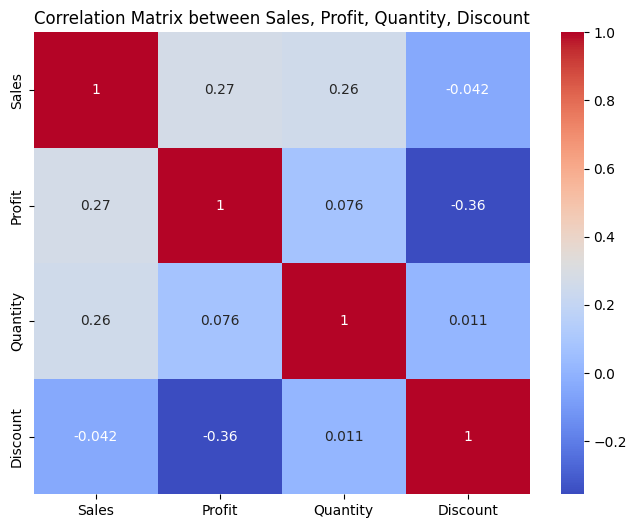

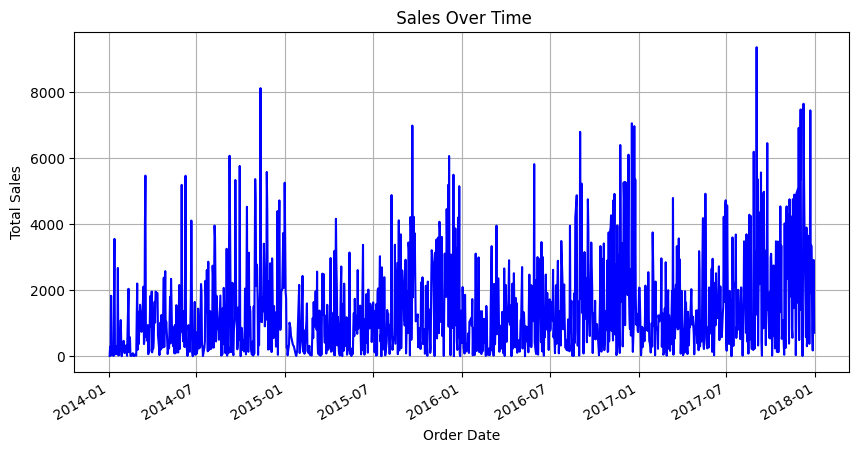

/tmp/ipykernel_37/265434775.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=data, estimator=sum, ci=None)


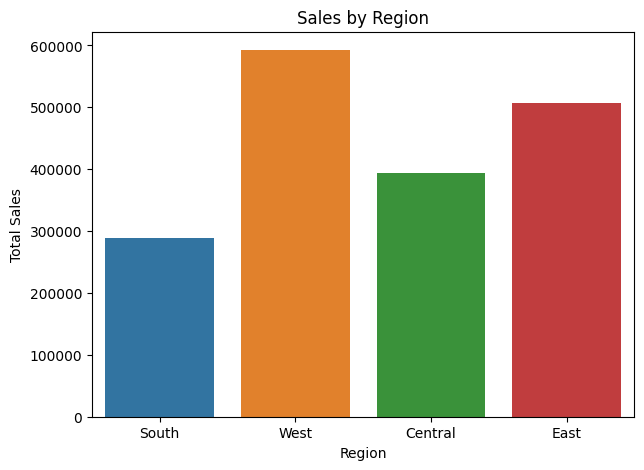

/tmp/ipykernel_37/265434775.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=data, estimator=sum, ci=None)


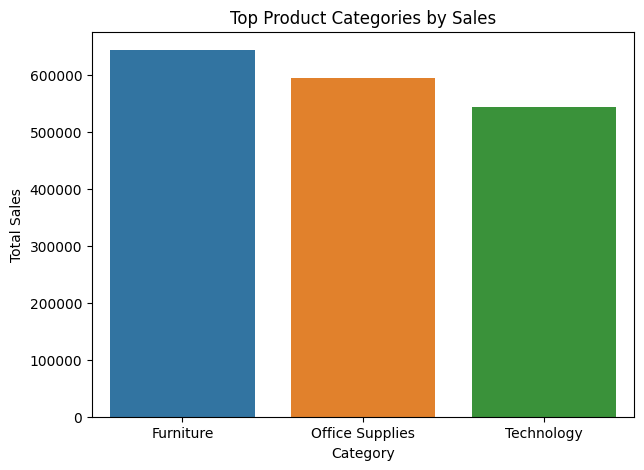

In [5]:
# --- Exploratory Data Analysis (EDA) ---

import matplotlib.pyplot as plt
import seaborn as sns

# ---  إحصائيات وصفية عامة ---
print(" Descriptive Statistics:")
print(data[['Sales', 'Profit', 'Quantity', 'Discount']].describe())

# ---  مصفوفة الارتباط (Correlation Matrix) ---
plt.figure(figsize=(8,6))
corr_matrix = data[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix between Sales, Profit, Quantity, Discount")
plt.show()

# ---  تحليل المبيعات عبر الزمن ---
sales_over_time = data.groupby('Order Date')['Sales'].sum()
plt.figure(figsize=(10,5))
sales_over_time.plot(kind='line', color='blue')
plt.title(' Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# ---  توزيع المبيعات حسب المنطقة ---
plt.figure(figsize=(7,5))
sns.barplot(x='Region', y='Sales', data=data, estimator=sum, ci=None)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# ---  أكثر الفئات مبيعًا ---
plt.figure(figsize=(7,5))
sns.barplot(x='Category', y='Sales', data=data, estimator=sum, ci=None)
plt.title('Top Product Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# --- 1️⃣ تحديد المتغيرات المستقلة (X) والتابعة (y) ---
X = data[['Sales', 'Discount', 'Quantity']]
y = data['Profit']

# --- 2️⃣ تقسيم البيانات إلى تدريب واختبار ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3️⃣ إنشاء نموذج الانحدار الخطي وتدريبه ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- 4️⃣ إجراء التنبؤ ---
y_pred = model.predict(X_test)

# --- 5️⃣ تقييم النموذج ---
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("🔹 Coefficients:", model.coef_)
print("🔹 Intercept:", model.intercept_)
print(f"🔹 R² Score: {r2:.3f}")
print(f"🔹 Mean Squared Error: {mse:.3f}")


🔹 Coefficients: [ 8.96423337e-02 -1.95371006e+02  8.21003861e-01]
🔹 Intercept: 30.313975420945205
🔹 R² Score: 0.223
🔹 Mean Squared Error: 6587.213


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                Sales    Profit  Cluster
Customer ID                             
AA-10315     1633.488  423.1319        0
AA-10375     1056.390  277.3824        0
AA-10480     1790.512  435.8274        0
AA-10645     5086.935  857.8033        2
AB-10015      886.156  129.3465        0


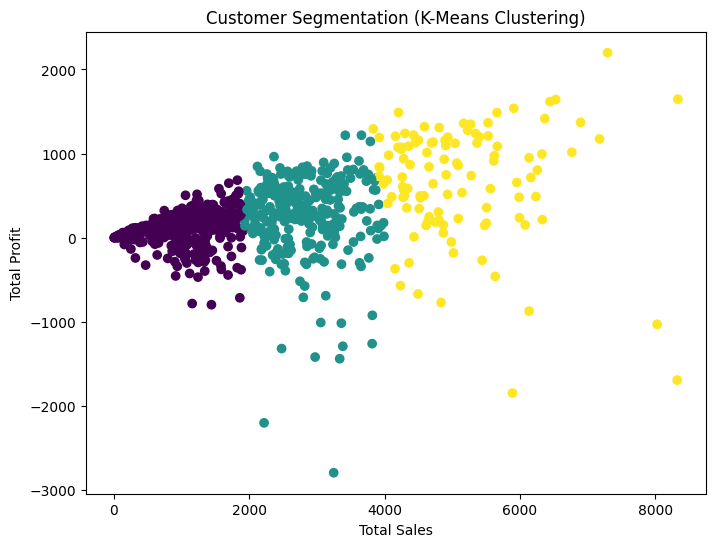

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# نختار خصائص مهمة من الزبائن
customer_data = data.groupby('Customer ID')[['Sales', 'Profit']].sum()

# تطبيق خوارزمية KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

# عرض النتيجة
print(customer_data.head())

# رسم المجموعات
plt.figure(figsize=(8,6))
plt.scatter(customer_data['Sales'], customer_data['Profit'], c=customer_data['Cluster'], cmap='viridis')
plt.title("Customer Segmentation (K-Means Clustering)")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.show()


/tmp/ipykernel_37/4195549841.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales_trend = data.groupby('Order Date')['Sales'].sum().resample('M').sum()


 Forecasted Sales:
2018-01-31    65141.041983
2018-02-28    61649.024356
2018-03-31    60734.119394
2018-04-30    60494.415252
2018-05-31    60431.613018
2018-06-30    60415.158899
Freq: ME, Name: predicted_mean, dtype: float64


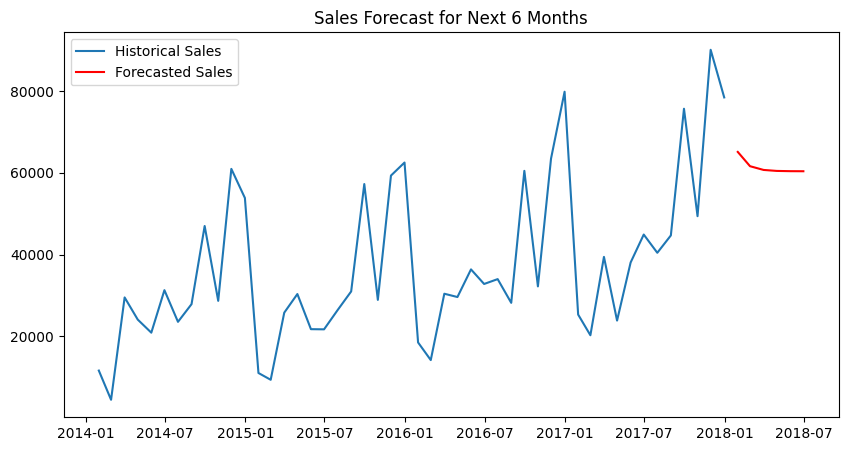

In [8]:
# نجمّع المبيعات حسب التاريخ
sales_trend = data.groupby('Order Date')['Sales'].sum().resample('M').sum()

# إنشاء نموذج بسيط للتنبؤ
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_trend, order=(1,1,1))
model_fit = model.fit()

# التنبؤ بـ 6 أشهر قادمة
forecast = model_fit.forecast(steps=6)
print(" Forecasted Sales:")
print(forecast)

# رسم النتيجة
plt.figure(figsize=(10,5))
plt.plot(sales_trend, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title("Sales Forecast for Next 6 Months")
plt.legend()
plt.show()
